# NAME:- RISHU RAJ KESHRI

# THE SPARKS FOUNDATION

# Data Science and Business Analytics Intern

# GRIP JANUARY 2023

# Task 3: Exploratory Data Analysis - Retail

## - We have to identify the weak areas in the business where profit can be increased

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action= 'ignore')

# - Loading Dataset and creating a dataframe(df)

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#finding shape of dataset
df.shape

(9994, 13)

#### The dataset contains 9994 rows and 13 columns.

In [4]:
#checking names of all columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# - Exploring the data

In [5]:
#Understanding data
df.describe()  #for statistical description of data

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Since the mean and standard deviation values have large difference, that means the dataset have outliers.
#### Also there are equal number of rows in all columns

In [6]:
#Checking unique values in different columns
df.nunique()  

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# - Data cleaning

In [7]:
#checking the need for data cleaning
#gathering the information about the non null count and data type

df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### It seems that there is no null values in the dataset

In [8]:
#confirming if there are any null values

df.isnull().sum()   #counting number of null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Since the sum of null values is zero for all columns, that means we don't have any null values in our dataset

In [9]:
# Checking  if there is any duplicate value

df.duplicated().sum()

17

#### There are duplicate values in the dataset which need to be removed

In [10]:
#Removing duplicate data from df
df.drop_duplicates(inplace=True)

In [11]:
#Checking if any duplicate value left
df.duplicated().sum()

0

#### All the duplicated values have been removed

In [12]:
#Finding shape of dataset after removal of duplicate rows
df.shape

(9977, 13)

#### The dataset has reduced to 9977 rows and 13 columns

In [13]:
#Analyzing dataset again
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
#Analyzing data type of columns
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### We have 4 numerical value columns
    Sales           
    Quantity          
    Discount       
    Profit   
#### We have 1 ordinal variable
    Postal code
#### All the other variable are in Categorical or qualitative measure

In [15]:
#finding correlation of columns
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [16]:
#Dropping the irrelevant column 'Postal Code'
df.drop(['Postal Code'],axis=1,inplace= True)

In [17]:
#Checking 
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### postal code column has been removed

In [18]:
#Finding correlation of numerical columns ('Sales','Quatity','Discount','Profit')
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


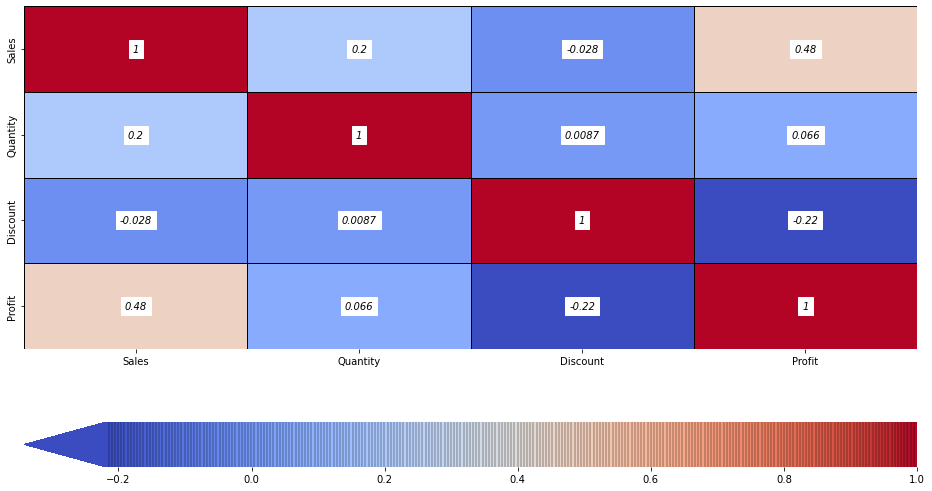

In [19]:
#plotting heatmap for better vizualization of correlation
plt.figure(figsize=(16,9))
cbar_kws= {"orientation":"horizontal",
          "shrink":1,
          "extend":"min",
          "extendfrac":0.1,
          "drawedges":True}
annot_kws={"fontsize":10,
          "fontstyle":"italic",
          'color':'k',
          'alpha':1,
          'verticalalignment':'center',
          'backgroundcolor':'w'}
sns.heatmap(df.corr(),annot=True,cbar_kws=cbar_kws,cmap= "coolwarm",linewidth=1,linecolor='k',annot_kws=annot_kws)
plt.show()

#### Sales and Profit are positively correlated
#### Quantity and Profit are positively correlated
#### Discount and Profit are negatively correlated

# - Checking for outliers

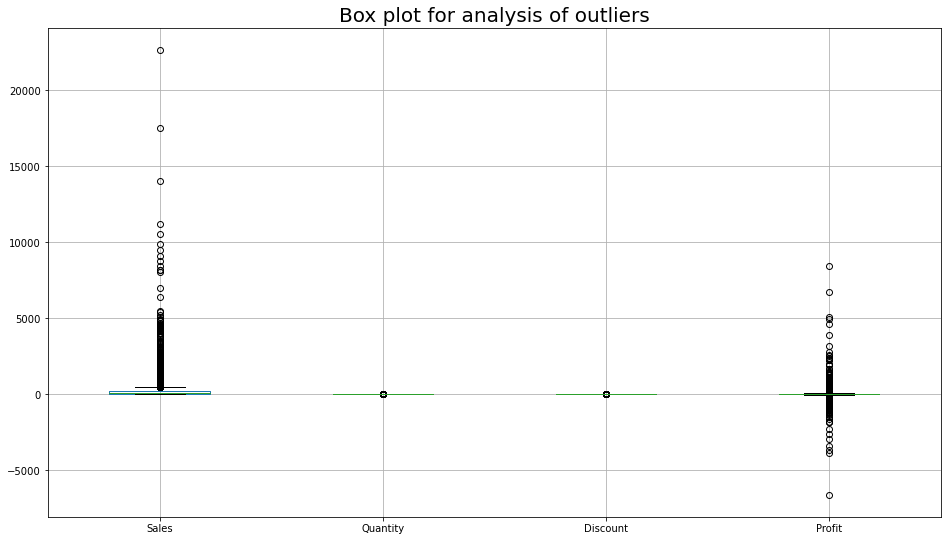

In [20]:
#Drawing boxplot to find outliers
plt.figure(figsize=(16,9))
df.boxplot()
plt.title("Box plot for analysis of outliers",fontsize=20)
plt.show()

#### Sales and Profit have outliers 
#### Quantity and Discount have no outliers

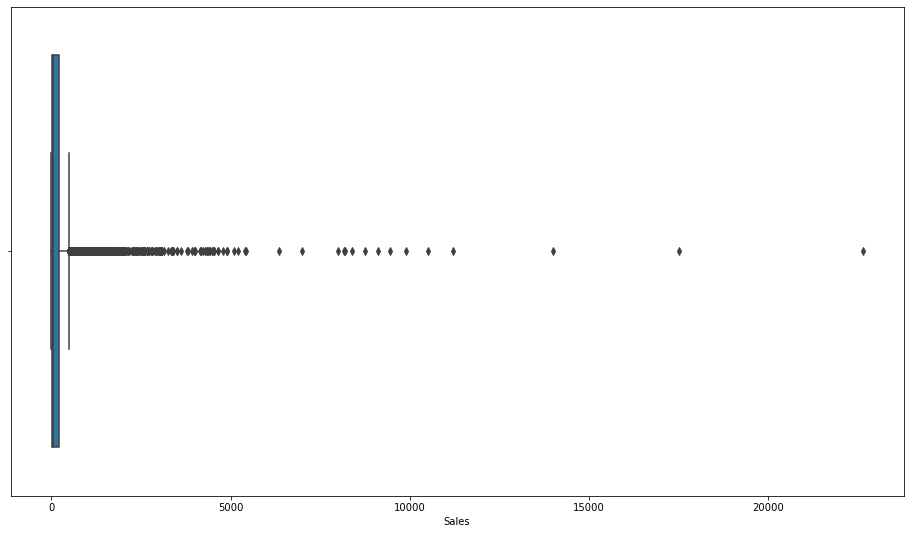

In [21]:
#Analyzing Sales outliers
plt.figure(figsize=(16,9))
sns.boxplot(df['Sales'])
plt.show()

In [22]:
#Finding index of outliers of Sales column
print(np.where(df['Sales']>10000))

(array([2622, 2696, 4186, 6817, 8139], dtype=int64),)


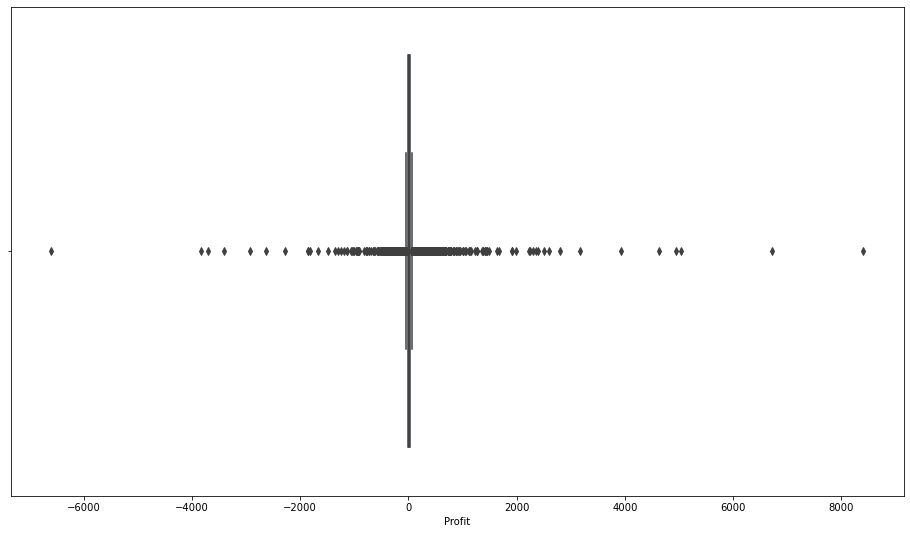

In [23]:
#Analyzing Profit outliers
plt.figure(figsize=(16,9))
sns.boxplot(df['Profit'])
plt.show()

In [24]:
#Finding index of outliers of Profit column
print(np.where(df['Profit']>4500))
print(np.where((df['Profit']<-4500)))

(array([4095, 4186, 6817, 8139, 9025], dtype=int64),)
(array([7760], dtype=int64),)


#### Their are only very few outliers
#### We cannot remove these outliers as it will affect our original data and our result.

<Figure size 3600x3600 with 0 Axes>

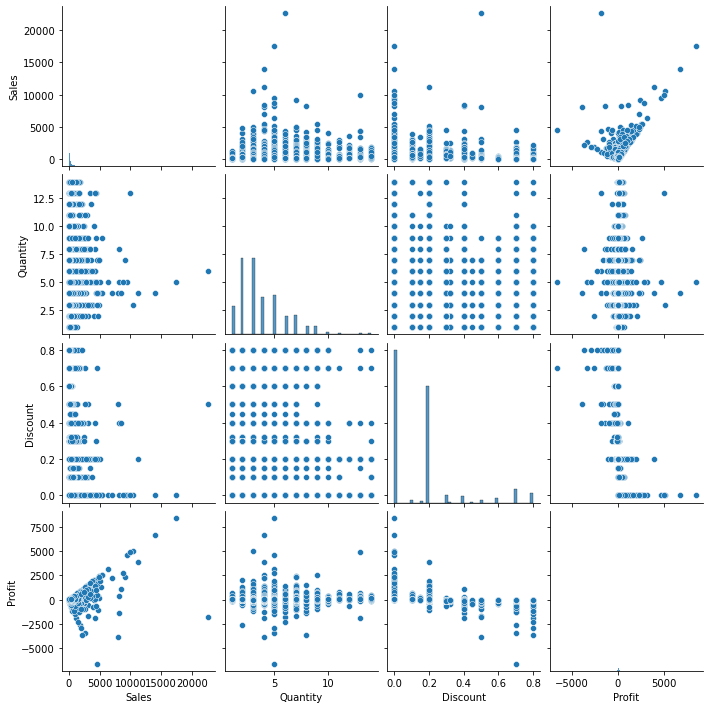

In [25]:
#Analyzing 'Sales','Quantity','Discount','Profit' column together by plotting pairplot
plt.figure(figsize=(50,50))
sns.pairplot(data= df, vars=['Sales','Quantity','Discount','Profit'],palette= '',diag_kind='hist')
plt.show()

# -Analyzing other column wrt Sales,Profit and Discount column

## SHIP MODE

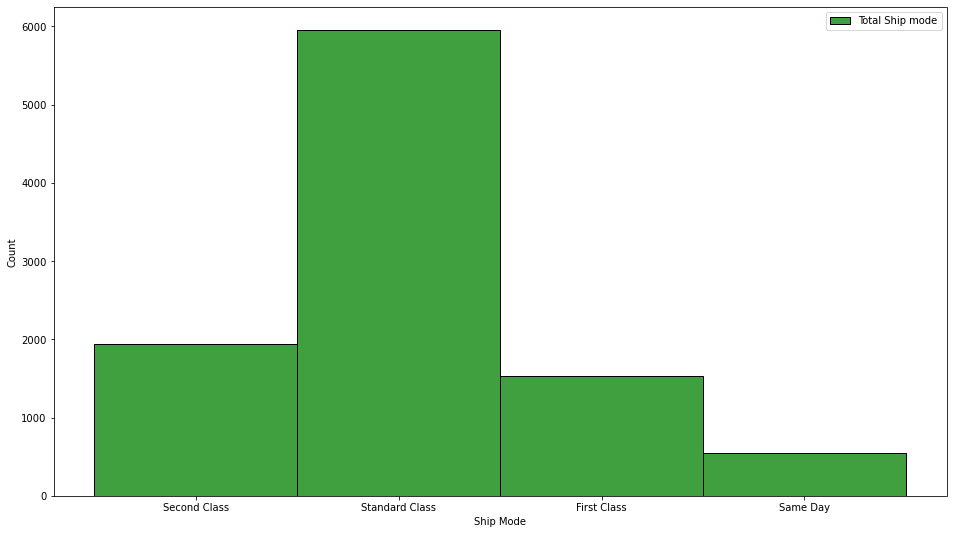

In [26]:
#Analyzing ship mode
plt.figure(figsize=(16,9))
sns.histplot(x=df['Ship Mode'],color='g',label='Total Ship mode')
plt.legend()
plt.show()

#### Standard class ship mode is preferred by most customer followed by second class.

In [27]:
#Sorting all categories of Ship modes
x=df['Ship Mode'].unique()
x.sort()
x

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

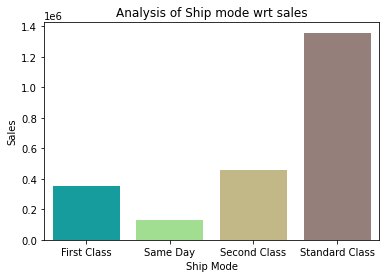

In [28]:
#Analyzing wrt to Sales
y=df.groupby(['Ship Mode'])['Sales'].sum()
sns.barplot(x=x, y=y,palette="terrain")
plt.title("Analysis of Ship mode wrt sales")
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.show()

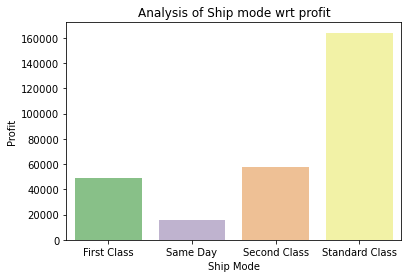

In [29]:
#Analyzing wrt to Profit
y1=df.groupby(['Ship Mode'])['Profit'].sum()
sns.barplot(x=x, y=y1,palette="Accent")
plt.title("Analysis of Ship mode wrt profit")
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.show()

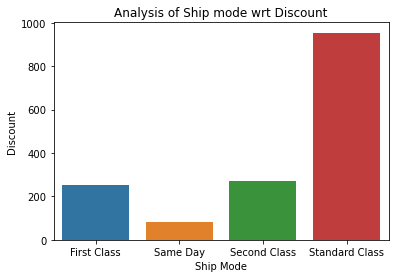

In [30]:
#Analyzing wrt to Discount
y2=df.groupby(['Ship Mode'])['Discount'].sum()
sns.barplot(x=x, y=y2)
plt.title("Analysis of Ship mode wrt Discount")
plt.xlabel("Ship Mode")
plt.ylabel("Discount")
plt.show()

## CONCLUSION
#### Standard Class ship Mode generates highest profit by having max sales and giving max discount
#### We should follow the same stragtegies in other ship mode to increase our profit

## SEGMENT

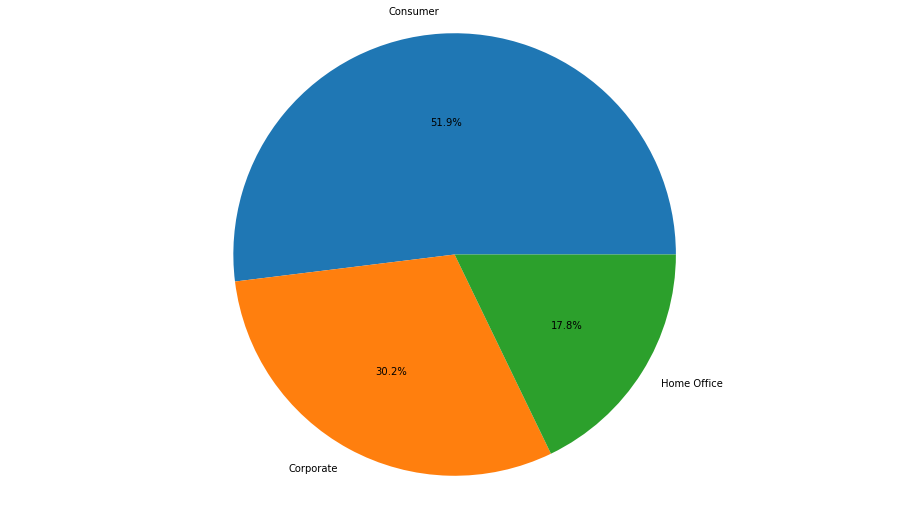

In [31]:
#Analyzing Segment
plt.figure(figsize=(16,9))
plt.pie(df['Segment'].value_counts(),labels=df['Segment'].value_counts().index, autopct="%.1f%%")
plt.axis("equal")
plt.show()

#### Consumer segment is preffered most

In [32]:
#Sorting all categories of Segment
x=df['Segment'].unique()
x.sort()
x

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

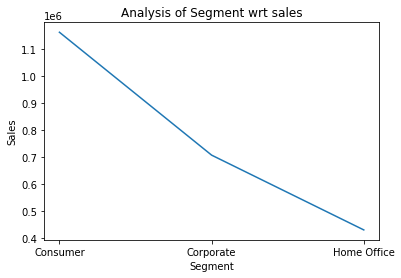

In [33]:
#Analyzing wrt to Sales
y=df.groupby(['Segment'])['Sales'].sum()
sns.lineplot(x=x, y=y)
plt.title("Analysis of Segment wrt sales")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()

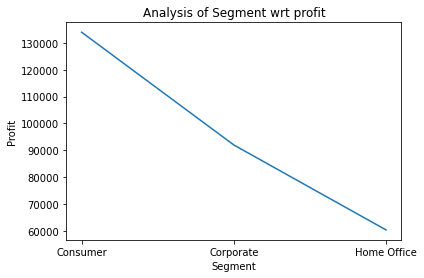

In [34]:
#Analyzing wrt to Profit
y1=df.groupby(['Segment'])['Profit'].sum()
sns.lineplot(x=x, y=y1)
plt.title("Analysis of Segment wrt profit")
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.show()

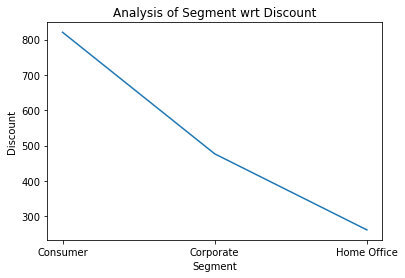

In [35]:
#Analyzing wrt to Discount
y2=df.groupby(['Segment'])['Discount'].sum()
sns.lineplot(x=x, y=y2)
plt.title("Analysis of Segment wrt Discount")
plt.xlabel("Segment")
plt.ylabel("Discount")
plt.show()

## Conclusion
##### We can see that Consumer segment is having maximum profit
##### we should give discount to other segment so that they can also generate good profit

# Country

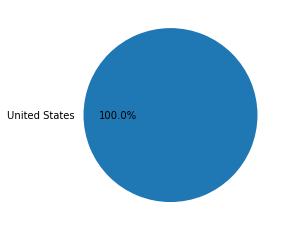

In [36]:
#Analyzing Country
plt.pie(df.Country.value_counts(), labels=df['Country'].value_counts().index, autopct="%.1f%%")
plt.show()

#### We can see their are only one country therefore we can remove this column

In [37]:
#Removing Country column
del df['Country']
df.head() #Re-checking

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Country column has been removed

# City

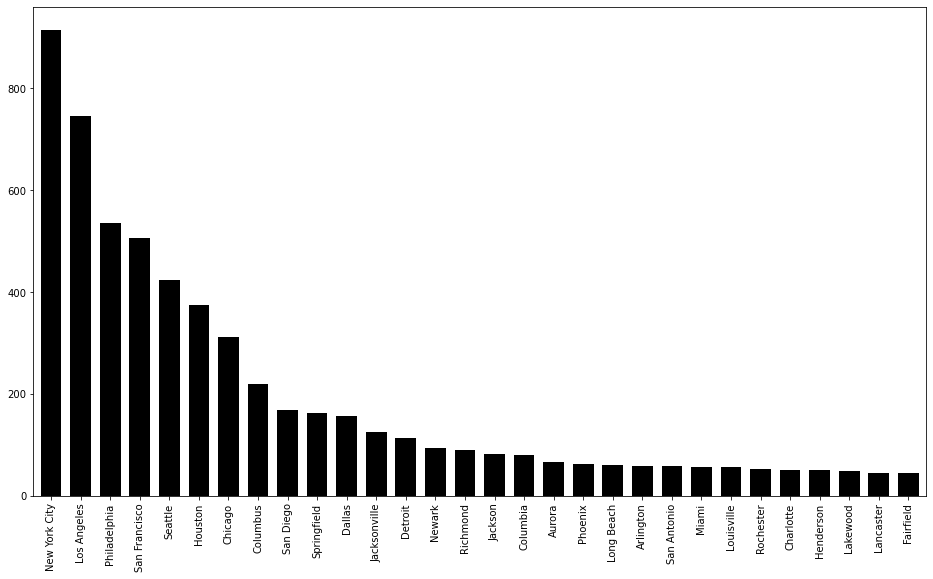

In [38]:
#Analyzing top 30 cities
plt.figure(figsize=(16,9))
df['City'].value_counts().nlargest(30).plot(kind='bar',color='k',width=0.7)
plt.show()

#### New York City have heighest count

<AxesSubplot:>

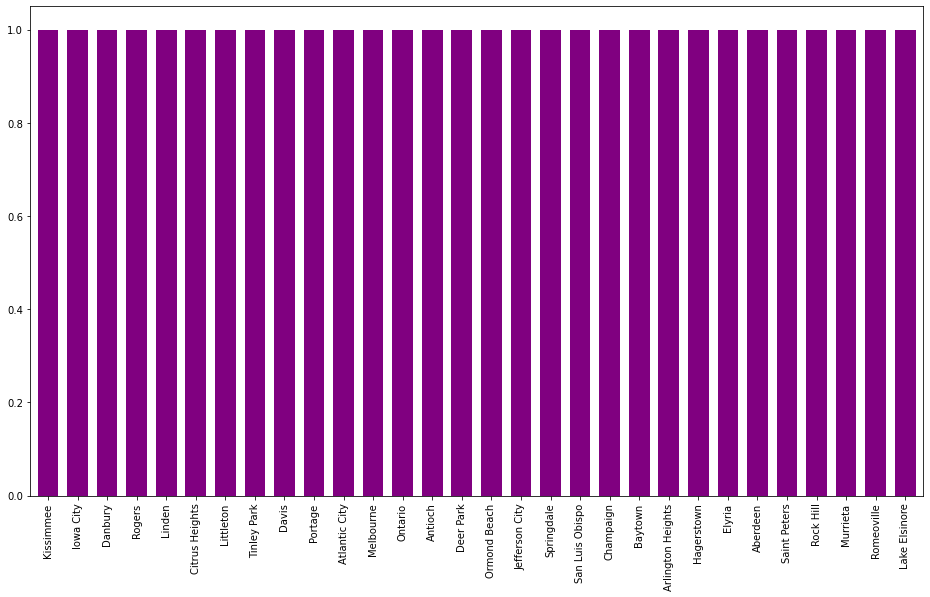

In [39]:
#Analyzing bottom 30 cities
plt.figure(figsize=(16,9))
df['City'].value_counts().nsmallest(30).plot(kind='bar',color='purple',width=0.7)

#### We must focus on these Cities to improve our profit

# State

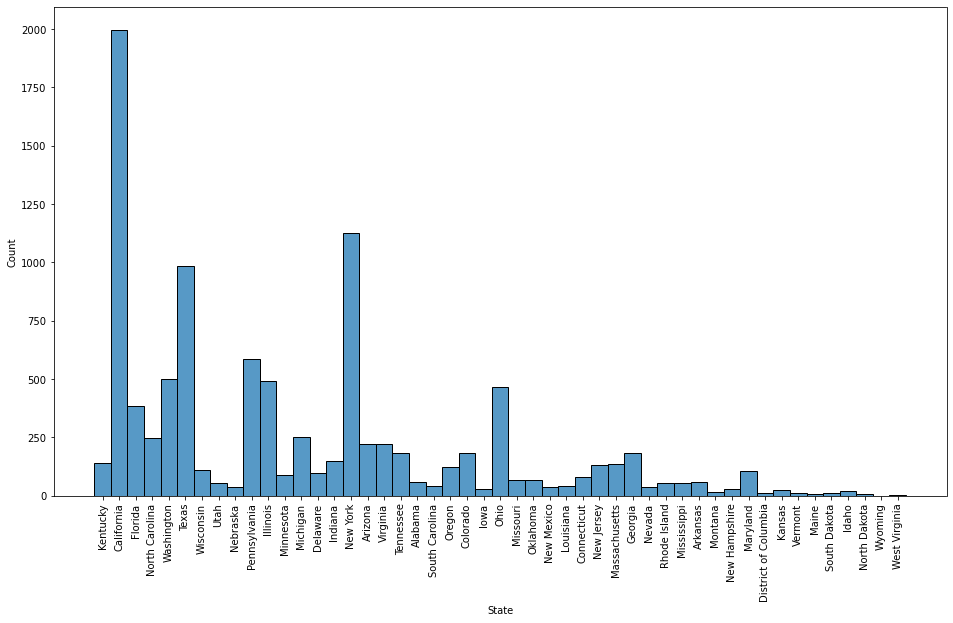

In [40]:
#Analyzing State
plt.figure(figsize=(16,9))
sns.histplot(df.State)
plt.xticks(rotation=90)
plt.show()

#### California is most preffered followed by New York
#### We must focus on right side state to improve our profit

In [41]:
#Sorting all State
x=df['State'].unique()
x.sort
x

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

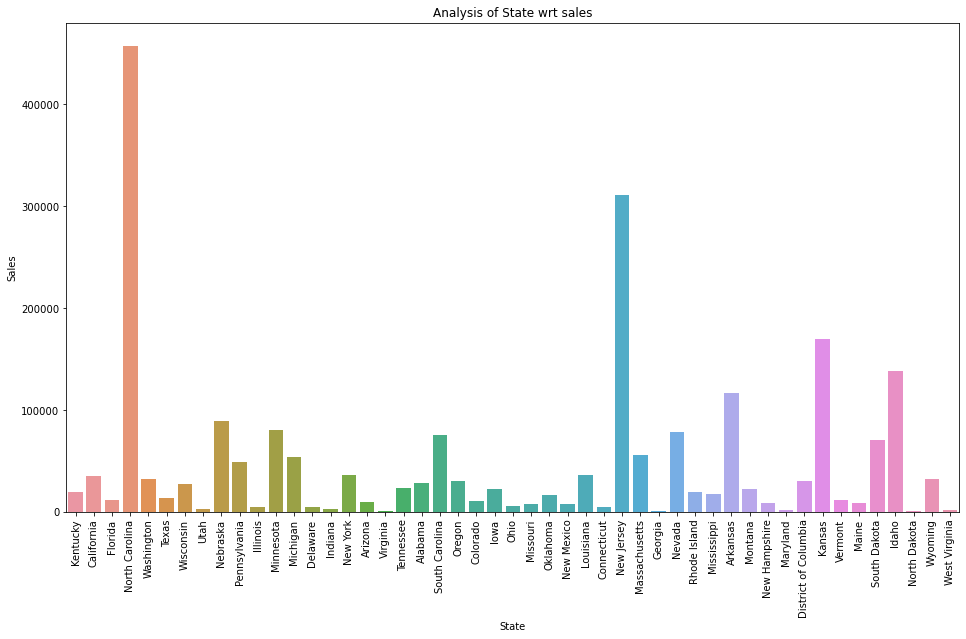

In [42]:
#Analyzing wrt to Sales
plt.figure(figsize=(16,9))
y=df.groupby(['State'])['Sales'].sum()
sns.barplot(x=x, y=y)
plt.title("Analysis of State wrt sales")
plt.xlabel("State")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

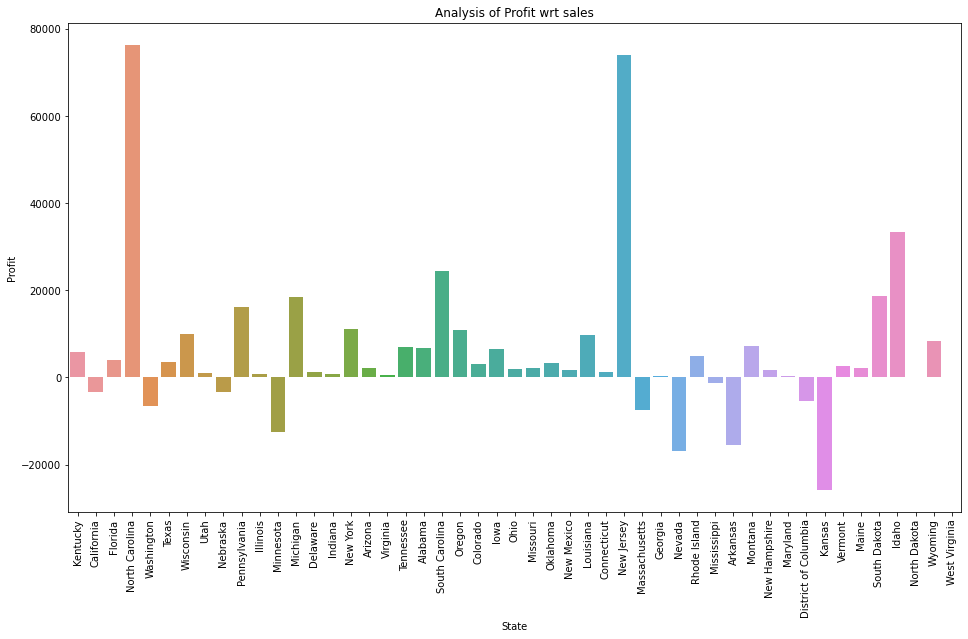

In [43]:
#Analyzing wrt to Profit
plt.figure(figsize=(16,9))
y1=df.groupby(['State'])['Profit'].sum()
sns.barplot(x=x, y=y1)
plt.title("Analysis of Profit wrt sales")
plt.xlabel("State")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

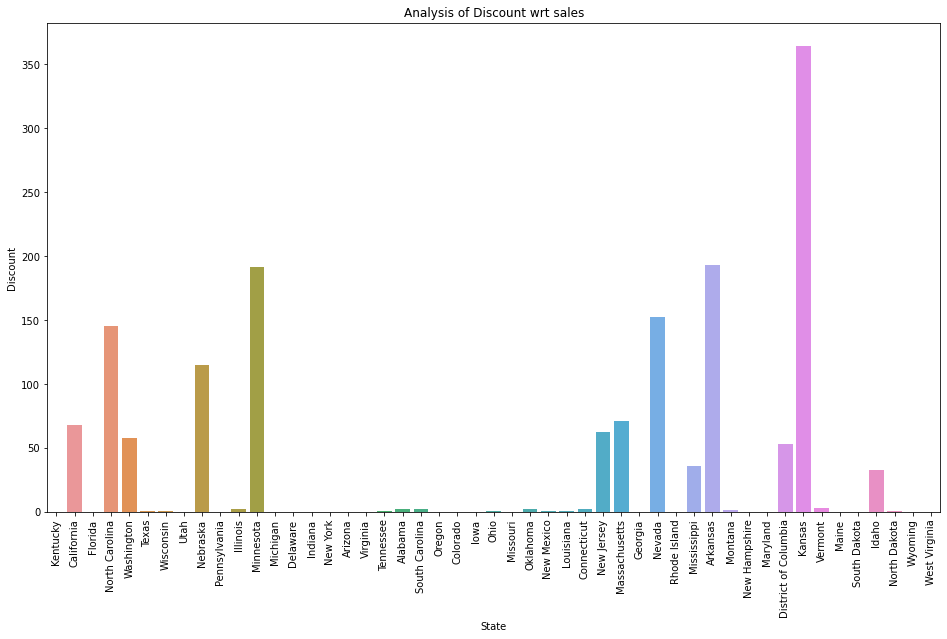

In [44]:
#Analyzing wrt to Discount
plt.figure(figsize=(16,9))
y2=df.groupby(['State'])['Discount'].sum()
sns.barplot(x=x, y=y2)
plt.title("Analysis of Discount wrt sales")
plt.xlabel("State")
plt.ylabel("Discount")
plt.xticks(rotation=90)
plt.show()

## Conclusion
#### North California have heighest profit even after giving less discount
#### We must reduce the discount of kansas because it is not generating us profit.
#### We must focus more on loss making state


# Region

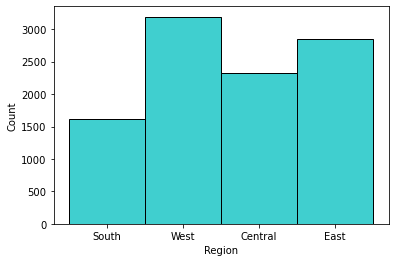

In [45]:
#Analyzing Region
sns.histplot(df.Region,color='c')
plt.show()

#### West region have maximum customer

In [46]:
#Sorting unique region
x=df['Region'].unique()
x.sort
x

array(['South', 'West', 'Central', 'East'], dtype=object)

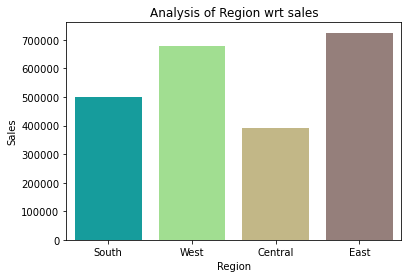

In [47]:
#Analyzing wrt to Sales
y=df.groupby(['Region'])['Sales'].sum()
sns.barplot(x=x, y=y,palette="terrain")
plt.title("Analysis of Region wrt sales")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

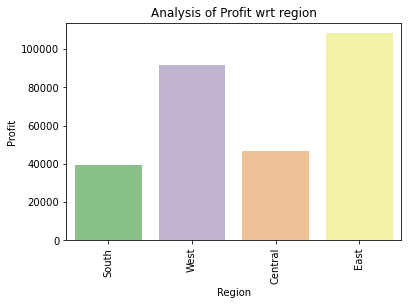

In [48]:
#Analyzing wrt to Profit
y1=df.groupby(['Region'])['Profit'].sum()
sns.barplot(x=x, y=y1,palette="Accent")
plt.title("Analysis of Profit wrt region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

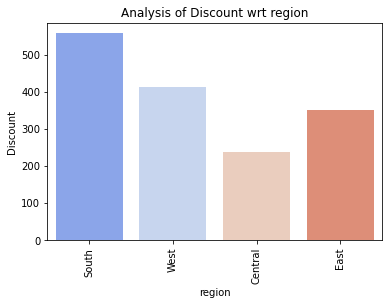

In [49]:
#Analyzing wrt to Discount
y2=df.groupby(['Region'])['Discount'].sum()
sns.barplot(x=x, y=y2,palette="coolwarm")
plt.title("Analysis of Discount wrt region")
plt.xlabel("region")
plt.ylabel("Discount")
plt.xticks(rotation=90)
plt.show()

### Conclusion
#### sales as well as profit of east region is highest although having a medium discount
#### We must avoid giving huge discount to south region inorder to increase our profit
#### We must also focus on Central region to maximize profit

# Category

<AxesSubplot:xlabel='Category', ylabel='Count'>

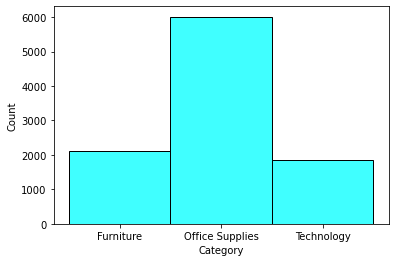

In [50]:
#Analyzing Category
sns.histplot(df.Category,color='cyan')

#### Office Supplies have the heighest demand

In [51]:
#Sorting unique Category
x=df['Category'].unique()
x.sort
x

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

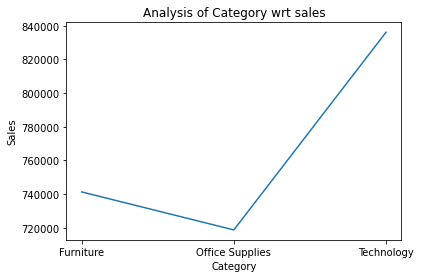

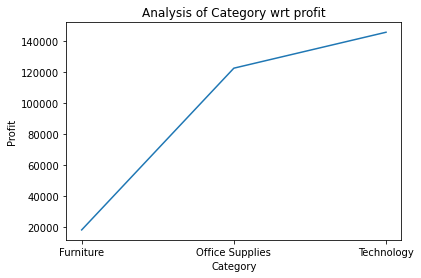

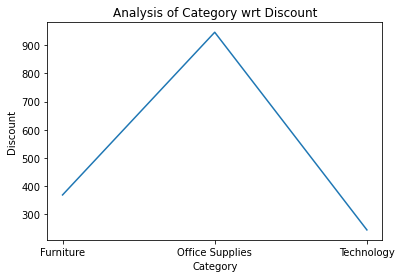

In [52]:
#Analyzing wrt Sales
y=df.groupby(['Category'])['Sales'].sum()
sns.lineplot(x=x, y=y)
plt.title("Analysis of Category wrt sales")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

#Analyzing wrt profit
y1=df.groupby(['Category'])['Profit'].sum()
sns.lineplot(x=x, y=y1)
plt.title("Analysis of Category wrt profit")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

#Analyzing wrt Discount
y2=df.groupby(['Category'])['Discount'].sum()
sns.lineplot(x=x, y=y2)
plt.title("Analysis of Category wrt Discount")
plt.xlabel("Category")
plt.ylabel("Discount")
plt.show()

### Conclusion 
##### Technology give us the best profit with least discount on the product
##### Even after giving huge discount on Office Supplies, we are not getting enough customer but the profit is decent
##### We must increase the discount on Furniture category to increase the Sales which in turn will increase the profit

# Sub-Category

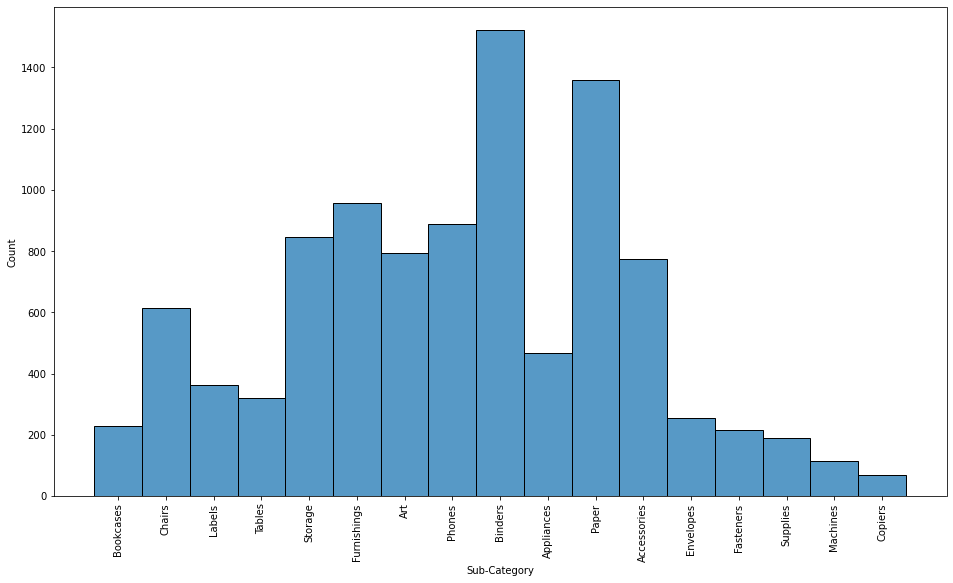

In [53]:
#Analyzing Sub-Category
plt.figure(figsize=(16,9))
sns.histplot(df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

#### Binders followed by Papers are in huge demand

In [54]:
#sorting unique values
x=df['Sub-Category'].unique()
x.sort
x

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

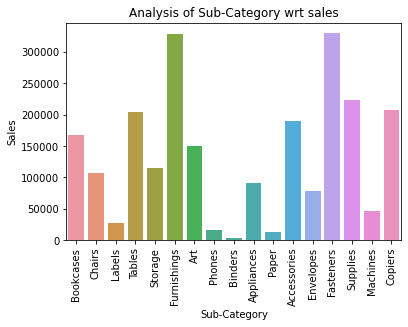

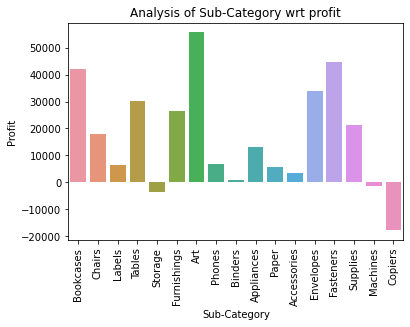

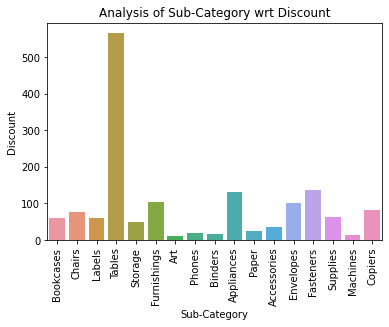

In [55]:
#Analyzing wrt Sales
y=df.groupby(['Sub-Category'])['Sales'].sum()
sns.barplot(x=x, y=y)
plt.title("Analysis of Sub-Category wrt sales")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

#Analyzing wrt profit
y1=df.groupby(['Sub-Category'])['Profit'].sum()
sns.barplot(x=x, y=y1)
plt.title("Analysis of Sub-Category wrt profit")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

#Analyzing wrt Discount
y2=df.groupby(['Sub-Category'])['Discount'].sum()
sns.barplot(x=x, y=y2)
plt.title("Analysis of Sub-Category wrt Discount")
plt.xlabel("Sub-Category")
plt.ylabel("Discount")
plt.xticks(rotation=90)
plt.show()

### Conclusion
#### Art Sub-Category have the heighest profit with least discount, so we must promote more Art category product
#### Even after having a decent sales, Copiers have negative profit so we try to remove this Sub-Category
#### Tables discount should be reduced

# CONCLUSION

- Standard class ship mode is preferred by most customer followed by second class
- Standard Class ship Mode generates highest profit by having max sales and giving max discount. We should follow the same stragtegies in other ship mode to increase our profit.
- Consumer segment is preffered most
- We can see that Consumer segment is having maximum profit.We should give discount to other segment so that they can also generate good profit
- New York City have heighest count and we must focus on bottom 30 cities to improve our profit
- California state is most preffered followed by New York.
- North California have heighest profit even after giving less discount
- We must reduce the discount of kansas because it is not generating us profit.
- We must focus more on loss making state to improve profit
- West region have maximum customer.
- sales as well as profit of east region is highest although having a medium discount
- We must avoid giving huge discount to south region inorder to increase our profit
- We must also focus on Central region to maximize profit
- Office Supplies category have the heighest demand
- Technology give us the best profit with least discount on the product
- Even after giving huge discount on Office Supplies, we are not getting enough customer but the profit is decent
- We must increase the discount on Furniture category to increase the Sales which in turn will increase the profit
- Binders followed by Papers are in huge demand in Sub-Category
- Art Sub-Category have the heighest profit with least discount, so we must promote more Art category product
- Even after having a decent sales, Copiers have negative profit so we try to remove this Sub-Category
- Tables discount should be reduced
- Overall to increase the profit, we must focus on all these weak areas and try to improve their condition.